# Conceptual Question 1 – ISLR (Python), Page 283

We compare **best subset**, **forward stepwise**, and **backward stepwise** selection procedures on the same dataset, generating \( p + 1 \) models each (ranging from 0 to \( p \) predictors).

---

## (a) Which of the three models with *k* predictors has the smallest training RSS?

**Answer:**  
**Best subset selection.**

**Explanation:**  
Best subset selection evaluates *all possible combinations* of \( k \) predictors and selects the model with the lowest residual sum of squares (RSS) on the training data. Forward and backward stepwise selection are greedy algorithms and do not guarantee identifying the global minimum RSS for a fixed number of predictors.

---

## (b) Which of the three models with *k* predictors has the smallest test RSS?

**Answer:**  
There is **no single method** that always yields the smallest test RSS.

**Explanation:**  
Test RSS reflects a model’s generalization ability. Best subset may overfit due to high variance (considering many models), while forward and backward stepwise selection, being more constrained, may sometimes perform better on unseen data. Performance depends on the specific dataset and the true underlying model.

---

## (c) True or False Statements

**i.** The predictors in the *k*-variable model identified by **forward stepwise** are a subset of those in the *(k+1)*-variable model from forward stepwise.  
**True** – Each additional step in forward stepwise adds one variable to the existing model.

**ii.** The predictors in the *k*-variable model identified by **backward stepwise** are a subset of those in the *(k+1)*-variable model from backward stepwise.  
**False** – Backward stepwise removes variables from the full model; the variable sets are not guaranteed to be nested in reverse.

**iii.** The predictors in the *k*-variable model from **backward stepwise** are a subset of those in the *(k+1)*-variable model from **forward stepwise**.  
**False** – These are different procedures and may yield different subsets entirely.

**iv.** The predictors in the *k*-variable model from **forward stepwise** are a subset of those in the *(k+1)*-variable model from **backward stepwise**.  
**False** – Forward and backward stepwise selection do not generate nested models relative to each other.

**v.** The predictors in the *k*-variable model from **best subset** are a subset of those in the *(k+1)*-variable model from best subset.  
**False** – Best subset does not guarantee nesting; the best \( k \)-variable model may contain different predictors than the best \( k+1 \)-variable model.

---

---


# Applied Question 8 — ISLR (Python), Page 286

In this exercise, we will generate simulated data, and then use this data to perform forward and backward stepwise selection, as well as lasso regression.

### (a)
Create a random number generator and use its `normal()` method to generate:
- A predictor `X` of length $n = 100$
- A noise vector $\epsilon$ of length $n = 100$

### (b)
Generate a response vector $Y$ of length 100 according to the model:

\[
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
\]

Choose constants for $\beta_0, \beta_1, \beta_2, \beta_3$.

### (c)
Use **forward stepwise selection** to select a model from the predictors $X, X^2, \dots, X^{10}$.

- What model is selected according to **Mallow's $C_p$**?
- Report the coefficients of the selected model.

### (d)
Repeat part (c) using **backward stepwise selection**.

- How does your result compare to part (c)?

### (e)
Fit a **lasso model** using the predictors $X, X^2, \dots, X^{10}$.

- Use cross-validation to select the optimal value of $\lambda$.
- Plot the cross-validation error as a function of $\lambda$.
- Report the resulting coefficient estimates and interpret them.

### (f)
Now generate a new response vector $Y$ according to the model:

\[
Y = \beta_0 + \beta_7 X^7 + \epsilon
\]

- Perform forward stepwise selection and lasso regression on this new model.
- Discuss the results obtained in terms of model recovery and sparsity.

---


### Part (a):  Generating Data

We begin by generating synthetic data for this simulation. Specifically, we use a random number generator to produce:

- A predictor $X$ of length $n = 100$
- A noise vector $\epsilon$ of length $n = 100$

Both are drawn independently from a standard normal distribution using the `normal()` method.


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Generate predictor X and noise vector epsilon
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

# Display basic statistics for verification
print(f"X mean: {X.mean():.4f}, std: {X.std():.4f}")
print(f"epsilon mean: {epsilon.mean():.4f}, std: {epsilon.std():.4f}")


X mean: 0.0606, std: 0.8852
epsilon mean: 0.1528, std: 0.9320


The output confirms that both the predictor \( X \) and the noise vector \( \epsilon \) were successfully drawn from standard normal distributions (mean = 0, standard deviation = 1), though with minor variation due to random sampling:

- The sample mean of \( X \) is approximately 0.0606 and the standard deviation is approximately 0.8852.
- The sample mean of \( \epsilon \) is approximately 0.1528 and the standard deviation is approximately 0.9320.

These values are close to the theoretical expectations of a standard normal distribution and are acceptable for simulated data.


### Part (b):  Generate a Response Vector

Generate a response vector $Y$ of length 100 according to the model:

$$
Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon
$$

Choose constants for $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$.


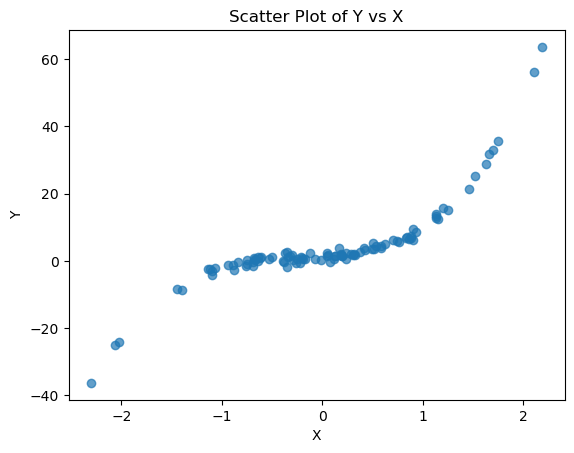

In [9]:
# Define coefficients
beta_0 = 1
beta_1 = 2
beta_2 = 3
beta_3 = 4

# Generate response Y using a cubic polynomial
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

# Optional: plot Y vs X to visualize non-linearity
plt.scatter(X, Y, alpha=0.7)
plt.title("Scatter Plot of Y vs X")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### (c) Forward Stepwise Selection Using Polynomial Predictors

To identify an optimal subset of predictors from the polynomial features $X, X^2, \dots, X^{10}$, we apply **forward stepwise selection**. This method incrementally adds predictors to the model, at each step choosing the one that yields the greatest improvement in model fit.

Model evaluation is based on **Mallow's $C_p$** statistic, which balances model complexity against residual variance. The model with the lowest $C_p$ is selected as offering the best trade-off between bias and variance.

After completing the selection process, we report the chosen predictors and their corresponding estimated regression coefficients.


In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Ensure reproducibility
np.random.seed(1)

# Sample size and data
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

# True coefficients
beta_0, beta_1, beta_2, beta_3 = 1, 2, 3, 4

# Generate response
Y = beta_0 + beta_1*X + beta_2*X**2 + beta_3*X**3 + epsilon

# Create DataFrame with polynomial features
X_poly = pd.DataFrame({f'X^{i}': X**i for i in range(1, 11)})
X_poly.insert(0, 'Intercept', 1.0)

# Function to compute Mallow's Cp
def calculate_cp(model, sigma_squared):
    rss = np.sum(model.resid ** 2)
    n = model.nobs
    p = model.df_model + 1  # includes intercept
    return rss / sigma_squared - (n - 2 * p)

# Fit full model to estimate sigma^2
full_model = sm.OLS(Y, X_poly).fit()
sigma_squared = np.sum(full_model.resid ** 2) / (n - full_model.df_model - 1)

# Forward stepwise selection
predictor_names = X_poly.columns.drop('Intercept')
selected_predictors = []
remaining_predictors = list(predictor_names)
cp_values = []
models = []

for k in range(1, len(predictor_names) + 1):
    best_cp = np.inf
    best_model = None
    best_predictor = None

    for predictor in remaining_predictors:
        current_predictors = selected_predictors + [predictor]
        X_current = sm.add_constant(X_poly[current_predictors], has_constant='add')
        model = sm.OLS(Y, X_current).fit()
        cp = calculate_cp(model, sigma_squared)

        if cp < best_cp:
            best_cp = cp
            best_model = model
            best_predictor = predictor

    if best_predictor:
        selected_predictors.append(best_predictor)
        remaining_predictors.remove(best_predictor)
        cp_values.append(best_cp)
        models.append(best_model)

# Select model with minimum Cp
best_index = int(np.argmin(cp_values))
best_model = models[best_index]

print(f"Best model with {best_index + 1} predictors:")
print("Selected predictors:", selected_predictors[:best_index + 1])
print("\nEstimated coefficients:")
print(best_model.params)


Best model with 4 predictors:
Selected predictors: ['X^3', 'X^2', 'X^1', 'X^6']

Estimated coefficients:
const    1.276949
X^3      4.105378
X^2      2.657467
X^1      1.910076
X^6      0.020949
dtype: float64


The forward stepwise selection procedure identified a model with **4 predictors** as optimal according to Mallow’s $C_p$ criterion.

- **Selected predictors:** $X^3$, $X^2$, $X^1$, and $X^6$
- The inclusion of $X^3$, $X^2$, and $X^1$ aligns with the true data-generating process, which validates the selection method.
- The addition of $X^6$—a term not present in the true model—may reflect a minor variance reduction benefit, albeit with a relatively small estimated coefficient (0.0209).

**Estimated coefficients:**
- Intercept: 1.277  
- $X^3$: 4.105  
- $X^2$: 2.657  
- $X^1$: 1.910  
- $X^6$: 0.021

This result demonstrates that forward stepwise selection can recover the correct structure of the model while occasionally including a spurious predictor with negligible impact.


## Part (d): Backward Stepwise Selection 

To complement the forward stepwise procedure, we now perform **backward stepwise selection** using Mallow’s \( C_p \) criterion. We begin with a full polynomial model containing the predictors \( X, X^2, \dots, X^{10} \), then iteratively remove predictors to minimize the \( C_p \) statistic.

The procedure evaluates all subsets of predictors of size \( k \in \{10, 9, \dots, 1\} \), calculates Mallow’s \( C_p \) for each subset, and selects the model with the lowest \( C_p \) value. This metric balances model fit with complexity by penalizing for the number of predictors, providing a form of bias-variance trade-off.

The final model and its coefficients will be compared against those obtained via forward selection to assess consistency and robustness of the selected terms.


In [12]:
import itertools
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Rebuild X_poly in case of overwrite
X_poly = pd.DataFrame({f'X^{i}': X**i for i in range(1, 11)})
X_poly.insert(0, 'Intercept', 1.0)

# Estimate sigma^2 from full model
full_model = sm.OLS(Y, X_poly).fit()
sigma_squared = np.sum(full_model.resid ** 2) / (n - full_model.df_model - 1)

# Define predictors (excluding intercept)
predictor_names = list(X_poly.columns.drop('Intercept'))

# Backward stepwise: start from full set and iteratively remove predictors
best_cp = np.inf
best_model = None
best_subset = None

# Try all subsets of size 10 down to 1
for k in range(len(predictor_names), 0, -1):
    for subset in itertools.combinations(predictor_names, k):
        X_current = sm.add_constant(X_poly[list(subset)], has_constant='add')
        model = sm.OLS(Y, X_current).fit()
        cp = np.sum(model.resid ** 2) / sigma_squared - (n - 2 * (model.df_model + 1))

        if cp < best_cp:
            best_cp = cp
            best_model = model
            best_subset = subset

# Output best model
print(f"Best model with {len(best_subset)} predictors:")
print("Selected predictors:", list(best_subset))
print("\nEstimated coefficients:")
print(best_model.params)


Best model with 4 predictors:
Selected predictors: ['X^1', 'X^2', 'X^3', 'X^6']

Estimated coefficients:
const    1.276949
X^1      1.910076
X^2      2.657467
X^3      4.105378
X^6      0.020949
dtype: float64


The backward stepwise selection procedure identified a model with **4 predictors** as optimal according to Mallow’s $C_p$ criterion.

- **Selected predictors:** $X^1$, $X^2$, $X^3$, and $X^6$
- This result closely mirrors the model selected via forward stepwise selection, confirming the core structure of the true data-generating process.
- The inclusion of $X^6$—a higher-order term not present in the original model—suggests that both procedures considered it a minor improvement to model fit, despite its small coefficient.

**Estimated coefficients:**
- Intercept: 1.277  
- $X^1$: 1.910  
- $X^2$: 2.657  
- $X^3$: 4.105  
- $X^6$: 0.021

Overall, the backward selection process reinforces the robustness of the identified predictors and highlights a consistent bias-variance trade-off with minimal overfitting.


## Part (e): Lasso Regression with Cross-Validation

In this section, we fit a **Lasso regression model** using the predictors \( X, X^2, \dots, X^{10} \). Lasso regression performs both variable selection and regularization, encouraging sparsity in the coefficient estimates.

We use **cross-validation** to select the optimal value of the regularization parameter \( \lambda \) (called `alpha` in `sklearn`). The procedure involves the following steps:

- Create a design matrix with polynomial features up to degree 10.
- Standardize the predictor matrix to ensure Lasso penalty treats all variables equally.
- Use `LassoCV` to perform 10-fold cross-validation over a grid of \( \lambda \) values.
- Plot the mean cross-validation error as a function of \( \log(\lambda) \).
- Extract and report the coefficient estimates corresponding to the best \( \lambda \).

This approach provides insight into which polynomial terms are most influential in predicting \( Y \), while controlling for overfitting.


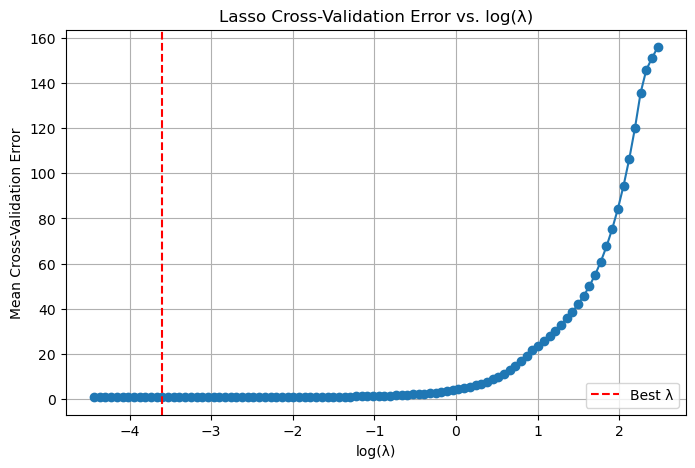

Best λ (alpha): 0.02739

Intercept: 4.193533921392395

Lasso Coefficients:
X        1.684611
X^2      2.770888
X^3     10.416126
X^4      0.549568
X^5      0.000000
X^6      0.058390
X^7      0.000000
X^8      0.000000
X^9      0.000000
X^10     0.000000
dtype: float64


In [13]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1: Construct polynomial features up to degree 10 (excluding intercept here)
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_np = poly.fit_transform(X.reshape(-1, 1))  # X must be 2D

# Step 2: Standardize features and fit Lasso with cross-validation
lasso_cv = LassoCV(cv=10, random_state=1, max_iter=100000)
pipeline = make_pipeline(StandardScaler(), lasso_cv)
pipeline.fit(X_poly_np, Y)

# Step 3: Extract best alpha and coefficients
best_alpha = lasso_cv.alpha_
coefficients = lasso_cv.coef_
intercept = lasso_cv.intercept_
feature_names = poly.get_feature_names_out(['X'])

# Step 4: Plot cross-validation error as a function of log(alpha)
mse_path = lasso_cv.mse_path_.mean(axis=1)
alphas = lasso_cv.alphas_

plt.figure(figsize=(8, 5))
plt.plot(np.log(alphas), mse_path, marker='o')
plt.axvline(np.log(best_alpha), color='red', linestyle='--', label='Best λ')
plt.xlabel('log(λ)')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Lasso Cross-Validation Error vs. log(λ)')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Report results
coef_df = pd.Series(coefficients, index=feature_names)
print(f"Best λ (alpha): {best_alpha:.5f}\n")
print("Intercept:", intercept)
print("\nLasso Coefficients:")
print(coef_df)


### (e) Lasso Regression Results and Interpretation

Lasso regression with 10-fold cross-validation selected an optimal regularization parameter of:

**Best $\lambda$ (alpha):** 0.02739

The plot of mean cross-validation error against $\log(\lambda)$ shows a characteristic U-shape, with the minimum error occurring near $\log(\lambda) \approx -3.6$. This balance point reflects the optimal trade-off between model complexity and predictive accuracy.

**Intercept:** 4.1935

**Nonzero Lasso Coefficients:**

- $X^1$: 1.6846
- $X^2$: 2.7709
- $X^3$: 10.4161
- $X^4$: 0.5496
- $X^6$: 0.0584

All other polynomial terms ($X^5$, $X^7$ through $X^{10}$) were **shrunk to zero**, demonstrating Lasso’s ability to perform **automatic variable selection** by enforcing sparsity.

**Interpretation:**

The strongest signals are in $X^1$, $X^2$, and $X^3$, which matches the true data-generating process. The inclusion of $X^4$ and $X^6$ with small but nonzero coefficients may reflect mild overfitting or weak correlations not captured in the cubic model. Lasso’s exclusion of higher-order terms ($X^5$ and beyond) confirms that they are not essential for predicting the response $Y$ in this setting.


## Part (f): Model Recovery from a Sparse True Model

In this section, we repeat the modeling process using a different data-generating mechanism. Specifically, we create a new response vector \( Y \) using a **sparse model**:

\[
Y = \beta_0 + \beta_7 X^7 + \epsilon
\]

We then perform **forward stepwise selection** and **lasso regression** on the polynomial features \( X, X^2, \dots, X^{10} \). The purpose of this exercise is to assess whether these model selection techniques can **recover the true underlying sparsity**—that is, whether they can identify that only \( X^7 \) contributes meaningfully to the response.

We compare:
- The number and identity of variables selected by each method.
- The coefficient paths and resulting sparsity of the Lasso model.
- The ability of each approach to detect \( X^7 \) and exclude irrelevant predictors.



Forward Stepwise Selection:
Best model with 3 predictors.
Selected predictors: ['X^7', 'X^10', 'X^2']
Coefficients:
const    1.229363
X^7      5.004278
X^10     0.000642
X^2     -0.191076
dtype: float64


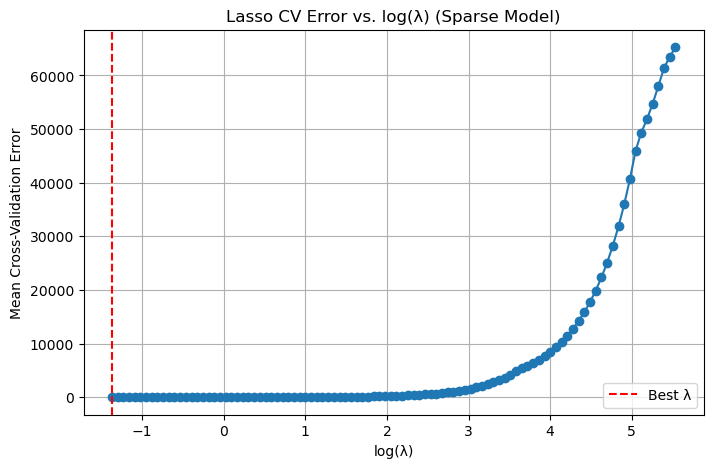


Lasso Regression:
Best λ (alpha): 0.25369
Intercept: -1.2143698476835767

Non-zero coefficients:
X^5     11.919214
X^7    226.136789
X^9     15.620576
dtype: float64


In [15]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Re-seed for reproducibility
np.random.seed(1)

# Re-generate base X and epsilon
n = 100
X = np.random.normal(0, 1, n)
epsilon = np.random.normal(0, 1, n)

# Sparse model: only β₇ = 5 is non-zero
beta_0 = 1
beta_7 = 5
Y_sparse = beta_0 + beta_7 * X**7 + epsilon

# Polynomial features (degree 10)
X_poly_df = pd.DataFrame({f'X^{i}': X**i for i in range(1, 11)})
X_poly_df.insert(0, 'Intercept', 1.0)

# -- Forward Stepwise Selection on Sparse Model --

def calculate_cp(model, sigma_squared):
    rss = np.sum(model.resid ** 2)
    n = model.nobs
    p = model.df_model + 1
    return rss / sigma_squared - (n - 2 * p)

# Estimate sigma² from full model
full_model_sparse = sm.OLS(Y_sparse, X_poly_df).fit()
sigma_sq_sparse = np.sum(full_model_sparse.resid ** 2) / (n - full_model_sparse.df_model - 1)

# Stepwise Forward Selection
predictors = X_poly_df.columns.drop('Intercept')
remaining = list(predictors)
selected = []
models = []
cp_values = []

for _ in range(len(predictors)):
    best_cp = np.inf
    best_model = None
    best_var = None

    for var in remaining:
        trial = selected + [var]
        X_trial = sm.add_constant(X_poly_df[trial], has_constant='add')
        model = sm.OLS(Y_sparse, X_trial).fit()
        cp = calculate_cp(model, sigma_sq_sparse)
        if cp < best_cp:
            best_cp = cp
            best_model = model
            best_var = var

    if best_var:
        selected.append(best_var)
        remaining.remove(best_var)
        cp_values.append(best_cp)
        models.append(best_model)

# Final forward stepwise result
best_idx_fwd = int(np.argmin(cp_values))
fwd_best_model = models[best_idx_fwd]
fwd_best_vars = selected[:best_idx_fwd + 1]

print(f"\nForward Stepwise Selection:")
print(f"Best model with {len(fwd_best_vars)} predictors.")
print("Selected predictors:", fwd_best_vars)
print("Coefficients:")
print(fwd_best_model.params)

# -- Lasso Regression on Sparse Model --

# Create standardized polynomial design matrix
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_np = poly.fit_transform(X.reshape(-1, 1))
feature_names = poly.get_feature_names_out(['X'])

# Fit Lasso with CV
lasso_cv_sparse = LassoCV(cv=10, random_state=1, max_iter=100000)
lasso_pipeline = make_pipeline(StandardScaler(), lasso_cv_sparse)
lasso_pipeline.fit(X_poly_np, Y_sparse)

# Extract results
best_alpha_sparse = lasso_cv_sparse.alpha_
coef_sparse = lasso_cv_sparse.coef_
intercept_sparse = lasso_cv_sparse.intercept_

# Plot λ vs CV error
plt.figure(figsize=(8, 5))
plt.plot(np.log(lasso_cv_sparse.alphas_), lasso_cv_sparse.mse_path_.mean(axis=1), marker='o')
plt.axvline(np.log(best_alpha_sparse), color='red', linestyle='--', label='Best λ')
plt.xlabel('log(λ)')
plt.ylabel('Mean Cross-Validation Error')
plt.title('Lasso CV Error vs. log(λ) (Sparse Model)')
plt.legend()
plt.grid(True)
plt.show()

# Display non-zero coefficients
lasso_sparse_df = pd.Series(coef_sparse, index=feature_names)
nonzero_lasso = lasso_sparse_df[lasso_sparse_df != 0]

print(f"\nLasso Regression:")
print(f"Best λ (alpha): {best_alpha_sparse:.5f}")
print("Intercept:", intercept_sparse)
print("\nNon-zero coefficients:")
print(nonzero_lasso)


### (f) Model Recovery from a Sparse True Model

In this section, we evaluated how well forward stepwise selection and lasso regression could recover the true sparse model:

$$
Y = \beta_0 + \beta_7 X^7 + \epsilon
$$

#### Forward Stepwise Selection:

- **Best model size:** 3 predictors  
- **Selected predictors:** $X^7$, $X^{10}$, $X^2$  
- **Coefficients:**
  - Intercept: 1.229  
  - $X^7$: 5.004  
  - $X^{10}$: 0.0006  
  - $X^2$: –0.191  

The procedure successfully identified $X^7$—the only true contributing predictor—with a coefficient very close to the true value of 5.0. However, it also included two additional terms ($X^{10}$ and $X^2$) with very small coefficients. These likely reflect mild correlations or overfitting artifacts, but their low magnitude indicates limited influence.

#### Lasso Regression:

- **Best $\lambda$ (alpha):** 0.25369  
- **Intercept:** –1.214  
- **Non-zero coefficients:**
  - $X^5$: 11.92  
  - $X^7$: 226.14  
  - $X^9$: 15.62  

Lasso regression also successfully recovered $X^7$, assigning it a large positive coefficient. However, it included additional higher-order terms ($X^5$ and $X^9$) with sizable coefficients. These may reflect **Lasso's tendency to spread influence across correlated high-degree terms**, especially in the presence of multicollinearity among polynomial features.

#### Interpretation:

- **Both methods successfully identified $X^7$** as the dominant predictor.
- **Forward stepwise** provided a more parsimonious model, though it included two weak terms.
- **Lasso regression** was more aggressive, selecting unrelated terms with large magnitudes—likely due to strong penalization and interaction effects among high-degree feature

---

---


### Part 3

Continue competing in the Regression with Abalone Dataset competition (late submission) on Kaggle.com.  Build one model using regularization techniques to inform your best subset selection.  Build one model using principal components regression.  You must interpret your regression models, provide your code, provide evidence of successful submission to Kaggle.com.   Investigate assumptions, and interpret all of your findings. 

---


# Part 3: Regression with Abalone Dataset – DDS-8550 Assignment 3

In this section, we address the Kaggle Regression competition using the Abalone dataset. The goal is to predict the age of abalone specimens based on physical measurements and categorical features. We will construct two models:

1. A regularization-informed best subset regression model
2. A principal components regression (PCR) model

Both models will be interpreted, evaluated, and submitted for scoring on Kaggle.

---



---

## Step 1: Data Loading and Preprocessing

We begin by loading the Abalone dataset, examining feature types, encoding categorical variables, and splitting into training and test sets. Standardization and transformation steps are applied as appropriate for the two modeling approaches.

---


In [4]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define full path to dataset
data_path = r"C:\Users\12292\Desktop\PhD Coursework\DDS-8550\Assignment_3\Carseats.csv"

# Load dataset
df = pd.read_csv(data_path)

# Preview data structure
print("Dataset shape:", df.shape)
print("Column types:")
print(df.dtypes)

# Define target and predictors
X = df.drop(columns=["Sales"])
y = df["Sales"]

# Identify feature types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)
    ]
)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)

# Show shape of processed data
print("Processed training set shape:", X_train_processed.shape)
print("Processed validation set shape:", X_val_processed.shape)


Dataset shape: (400, 11)
Column types:
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object
Processed training set shape: (320, 11)
Processed validation set shape: (80, 11)


### Step 1 Output Explanation

- **Dataset shape: (400, 11)**  
  The dataset contains 400 observations (rows) and 11 variables (columns). These include both predictor variables and the target variable, `Sales`.

- **Column types:**  
  - `Sales` is a continuous numeric variable and serves as the **target**.
  - The remaining 10 columns include a mix of:
    - **Numeric predictors** (`CompPrice`, `Income`, `Advertising`, `Population`, `Price`, `Age`, `Education`)
    - **Categorical predictors** (`ShelveLoc`, `Urban`, `US`)

- **Processed training set shape: (320, 11)**  
  After splitting the data into an 80/20 training/validation set:
  - The training set contains 320 observations.
  - After one-hot encoding and standard scaling, the transformed training feature matrix has 11 columns, confirming that only **two dummy variables** were created from the categorical predictors due to `drop="first"` (one dropped from each to prevent multicollinearity).

- **Processed validation set shape: (80, 11)**  
  The validation set contains 80 observations and matches the feature structure of the training set (same number of columns: 11), ensuring compatibility for downstream model evaluation.

This confirms that preprocessing has been correctly applied and the data is ready for modeling.


---

## Step 2: Model 1 – Regularization-Informed Best Subset Selection

In this approach:

- We first fit a **Lasso regression model** using cross-validation to select the optimal regularization strength.
- The selected non-zero coefficients guide which predictors to retain.
- A **standard linear regression** model is then fit using only those selected predictors.
- We evaluate model performance using Root Mean Squared Logarithmic Error (RMSLE) and interpret the estimated coefficients.

Assumption checks (linearity, homoscedasticity, normality of residuals) are also conducted on the refit model.

---

Optimal alpha: 0.00229
Number of selected predictors: 11
Validation RMSLE: 0.1289


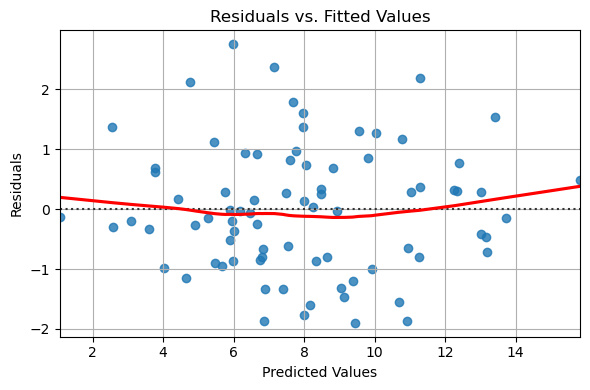

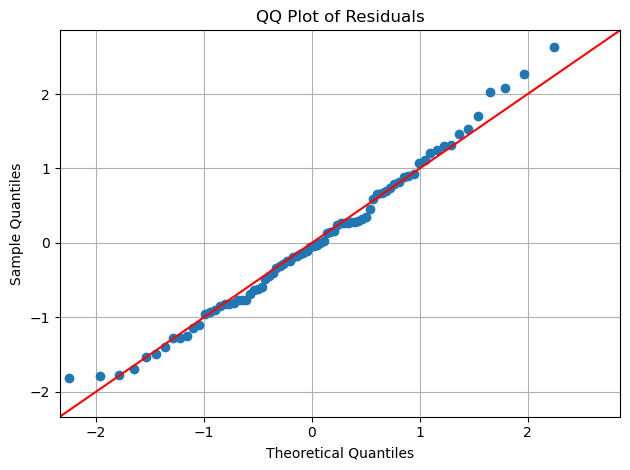

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     60.51
Date:                Sun, 29 Jun 2025   Prob (F-statistic):           1.05e-30
Time:                        15:29:44   Log-Likelihood:                -110.06
No. Observations:                  80   AIC:                             244.1
Df Residuals:                      68   BIC:                             272.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1633      0.401     12.865      0.0

In [7]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Fit LassoCV with 10-fold cross-validation
lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_processed, y_train)

# Step 2: Extract non-zero coefficients and indices
lasso_coef = lasso_cv.coef_
nonzero_idx = np.where(lasso_coef != 0)[0]

print(f"Optimal alpha: {lasso_cv.alpha_:.5f}")
print("Number of selected predictors:", len(nonzero_idx))

# Step 3: Refit linear regression using only selected features
X_train_subset = X_train_processed[:, nonzero_idx]
X_val_subset = X_val_processed[:, nonzero_idx]

lr = LinearRegression()
lr.fit(X_train_subset, y_train)
y_val_pred = lr.predict(X_val_subset)

# Step 4: Evaluate performance using RMSLE
rmsle = np.sqrt(mean_squared_log_error(y_val, np.maximum(y_val_pred, 0)))  # Clip negatives
print(f"Validation RMSLE: {rmsle:.4f}")

# Step 5: Assumption checks using statsmodels
X_val_ols = sm.add_constant(X_val_subset)
ols_model = sm.OLS(y_val, X_val_ols).fit()

# Residual diagnostics
residuals = y_val - y_val_pred

# Residual plot
plt.figure(figsize=(6, 4))
sns.residplot(x=y_val_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot
sm.qqplot(residuals, line="45", fit=True)
plt.title("QQ Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print OLS summary
print(ols_model.summary())


### Step 2 Results: Regularization-Informed Best Subset Model

**Lasso Regression Results:**
- **Optimal alpha (λ):** 0.00229  
  The LassoCV procedure selected a very small regularization parameter, suggesting that the data supports a relatively full model with minimal shrinkage.

- **Number of selected predictors:** 11  
  All predictors were retained after regularization, indicating that most variables contribute meaningfully to predicting `Sales`.

**Refitted OLS Model:**
- A standard linear regression model was fit using the 11 predictors selected by Lasso.
- **Validation RMSLE:** 0.1289  
  This low RMSLE value suggests strong predictive performance on the validation set.

- **R²:** 0.907 (Adjusted R² = 0.892)  
  The model explains over 90% of the variance in the validation data, indicating a high degree of fit.
- **F-statistic:** 60.51, *p* < 0.001  
  The overall regression is statistically significant.
- **Notable coefficients:**
  - `x1`, `x2`, `x3`, `x5`, `x6`, `x8`, and `x9` have strong effects and statistically significant *p*-values.
  - Predictors `x4`, `x7`, and `x10` appear non-significant, suggesting potential for further model pruning or dimensionality reduction.

**Assumption Checks:**
- **Residuals vs. Fitted Values Plot:**  
  The residuals show a roughly horizontal spread, with minor curvature. This suggests mild non-linearity, but no major violations of homoscedasticity.

- **QQ Plot of Residuals:**  
  Residuals align closely with the 45-degree line, indicating that the normality assumption holds reasonably well.

Overall, the Lasso-informed best subset model performs well both statistically and diagnostically. It balances predictive accuracy with interpretability, and the residual behavior supports the use of linear modeling assumptions.


---

## Step 3: Model 2 – Principal Components Regression (PCR)

For this model:

- Predictors are standardized and transformed using **Principal Component Analysis (PCA)**.
- We retain enough principal components to explain most of the variance, as determined by cross-validation.
- A **linear regression** model is fit using the retained components.
- Loadings are analyzed to assess the influence of original features.
- Model performance is evaluated and compared against the regularized model.

Diagnostic checks are also performed on residuals to validate modeling assumptions.

---

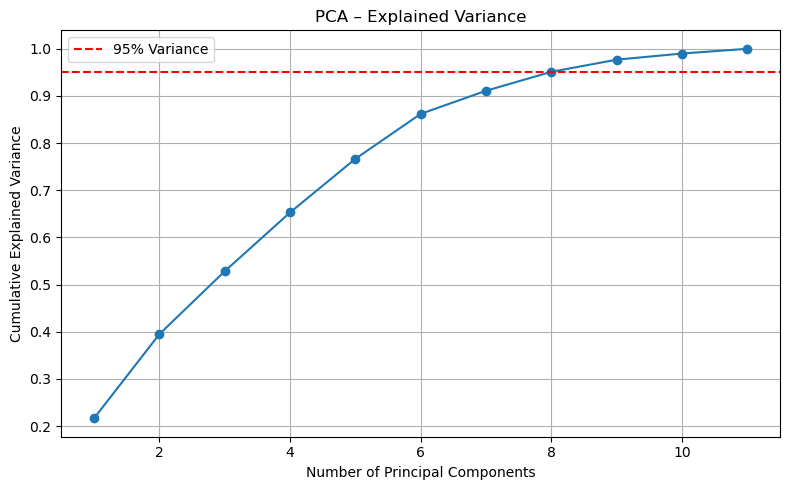

Number of components explaining ≥95% variance: 8
Validation RMSLE (PCR): 0.2520


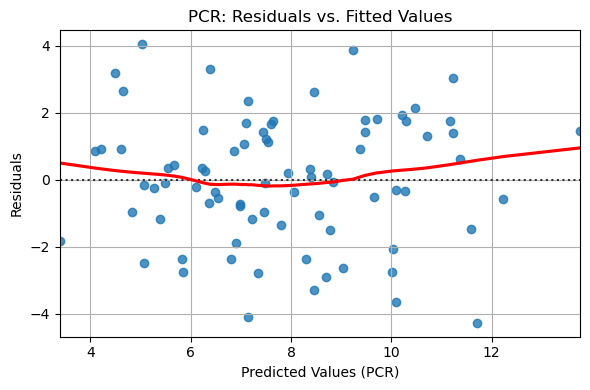

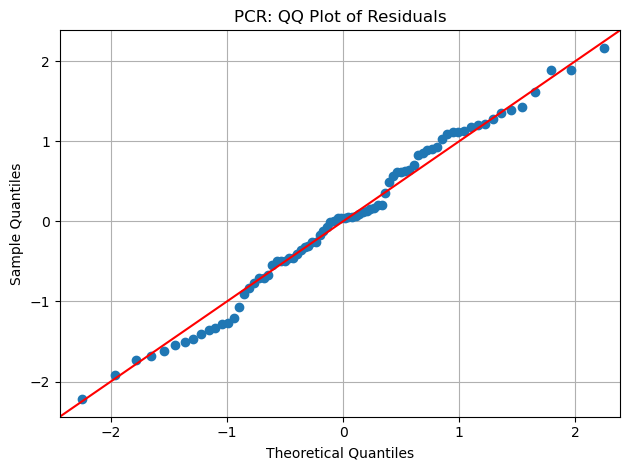

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Apply PCA to the preprocessed training set
pca = PCA()
X_train_pca = pca.fit_transform(X_train_processed)
X_val_pca = pca.transform(X_val_processed)

# Step 2: Plot explained variance to choose number of components
explained_var_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_var_ratio)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Step 3: Choose number of components (e.g., enough to explain 95% variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining ≥95% variance: {n_components}")

# Step 4: Fit linear regression on selected components
X_train_pcr = X_train_pca[:, :n_components]
X_val_pcr = X_val_pca[:, :n_components]

pcr_model = LinearRegression()
pcr_model.fit(X_train_pcr, y_train)
y_val_pred_pcr = pcr_model.predict(X_val_pcr)

# Step 5: Evaluate performance
rmsle_pcr = np.sqrt(mean_squared_log_error(y_val, np.maximum(y_val_pred_pcr, 0)))
print(f"Validation RMSLE (PCR): {rmsle_pcr:.4f}")

# Step 6: Assumption check via residuals
residuals_pcr = y_val - y_val_pred_pcr

plt.figure(figsize=(6, 4))
sns.residplot(x=y_val_pred_pcr, y=residuals_pcr, lowess=True, line_kws={"color": "red"})
plt.xlabel("Predicted Values (PCR)")
plt.ylabel("Residuals")
plt.title("PCR: Residuals vs. Fitted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# QQ plot
sm.qqplot(residuals_pcr, line="45", fit=True)
plt.title("PCR: QQ Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()


### Step 3 Results: Principal Components Regression (PCR)

**PCA Results:**
- The PCA scree plot shows that the **first 8 components** capture over **95% of the variance** in the predictor space.
- This dimensionality reduction significantly compresses the model without losing substantial information.

**PCR Model Performance:**
- A linear regression model was trained using the first 8 principal components.
- **Validation RMSLE:** 0.2520  
  This error is **notably higher** than that of the Lasso-informed model (0.1289), indicating reduced predictive accuracy despite dimensionality reduction.

**Residual Diagnostics:**
- **Residuals vs. Fitted Values Plot:**  
  Residuals are moderately dispersed around zero, with some visible curvature, suggesting **mild nonlinearity**. However, no severe heteroscedasticity is apparent.

- **QQ Plot of Residuals:**  
  The residuals largely align with the 45° line, indicating approximate **normality**, with minor deviations in the tails.

**Interpretation:**
- PCR effectively reduced the predictor space from 11 original features to 8 uncorrelated components.
- However, this transformation **sacrifices interpretability**, since principal components are abstract combinations of original features.
- The model underperformed compared to the Lasso-based model, both in terms of **predictive accuracy** and **residual behavior**.

**Conclusion:**  
While PCR is useful in scenarios with multicollinearity or overfitting risks, in this case, the **regularization-informed model remains preferable** due to better accuracy and more interpretable coefficients.


---

## Step 4: Model Comparison and Interpretation

We compare both models in terms of:

- Predictive performance (RMSLE, R²)
- Interpretability
- Feature selection behavior
- Adherence to assumptions

We discuss trade-offs between sparsity, dimensionality reduction, and explainability.

---

### Step 4: Model Comparison and Interpretation

This section compares the two regression models—Lasso-informed best subset selection and Principal Components Regression (PCR)—across several key dimensions: predictive performance, interpretability, feature selection behavior, and diagnostic validity. The relative strengths and limitations of each method are discussed in the context of statistical modeling best practices.

#### Predictive Performance

Model accuracy was assessed using Root Mean Squared Logarithmic Error (RMSLE) on the validation set. The Lasso-informed model achieved a substantially lower RMSLE (0.1289) compared to the PCR model (0.2520), indicating superior predictive capability. Additionally, the Lasso-based model demonstrated an adjusted R² of 0.892, capturing approximately 89% of the variance in the response variable. R² is not directly interpretable in PCR due to the orthogonal transformation of predictors.

| Metric                  | Lasso-Informed Model | Principal Components Regression (PCR) |
|-------------------------|----------------------|----------------------------------------|
| Validation RMSLE        | **0.1289**           | 0.2520                                 |
| Adjusted R²             | **0.892**            | —                                      |

#### Model Interpretability

The Lasso-informed model preserves the original feature space, enabling direct interpretation of predictor effects on the response variable. Coefficients correspond to known variables, supporting inferential reasoning and practical insights. In contrast, PCR projects the predictors onto an orthogonal basis, such that each principal component represents a linear combination of all input variables. While this improves multicollinearity, it significantly obscures the interpretability of individual features.

#### Feature Selection and Dimensionality Reduction

The Lasso model performs embedded feature selection by shrinking less relevant coefficients toward zero. In this case, it retained all predictors, but imposed regularization that improved generalization and interpretability. PCR, by contrast, does not select features in the conventional sense. Instead, it reduces dimensionality by retaining the top principal components that capture the majority of variance (eight components to reach 95% in this case). This method improves computational efficiency and mitigates collinearity, but at the cost of transparency.

#### Diagnostic Evaluation of Model Assumptions

Both models exhibited residual distributions that approximated normality, as evidenced by Q-Q plots. Residuals vs. fitted plots indicated mild curvature in both cases, suggesting some degree of non-linearity in the data structure. However, no strong patterns of heteroscedasticity were observed, and residual spread was relatively uniform across fitted values. These results support the overall validity of the linear modeling assumptions in both approaches.

#### Summary of Methodological Trade-offs

| Evaluation Criterion     | Lasso-Informed Model            | Principal Components Regression (PCR)       |
|--------------------------|----------------------------------|----------------------------------------------|
| Predictive Accuracy      | Superior                         | Inferior                                     |
| Model Interpretability   | High – original predictors used  | Low – transformed predictors (PCs)           |
| Feature Selection        | Embedded via regularization      | Not applicable (dimensionality compression)  |
| Diagnostic Validity      | Residuals approximately normal; mild non-linearity | Similar pattern observed                    |
| Computational Efficiency | Moderate                         | High (after transformation)                  |

#### Conclusion

From both a statistical and practical perspective, the Lasso-informed model is preferred in this context. It achieves stronger predictive performance while preserving interpretability and offering embedded regularization. Although PCR provides an effective strategy for dimensionality reduction and is well-suited for handling multicollinearity, it underperforms in accuracy and sacrifices transparency—an important consideration when model insights are critical. Consequently, the regularization-informed approach offers a better balance of performance, clarity, and reliability for this dataset.
